In [1]:
import random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [2]:
data = np.load('data/images.npy')
label = np.load('data/labels.npy')
data.shape, label.shape

((2682, 600, 400, 3), (2682, 10))

In [3]:
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.3, random_state=42, shuffle=True)

In [4]:
dic = {0 : 'sunglass', 1 : 'hat', 2: 'jacket', 3 : 'shirt',
 4 : 'pants', 5 : 'shorts', 6 : 'skirt', 7 : 'dress',
 8: 'bag', 9 : 'shoe'}

In [5]:
def get_label(label):
    labels =[]
    for idx, val in enumerate(label):
        if(val == 1):
            labels.append(dic[idx])
    return labels

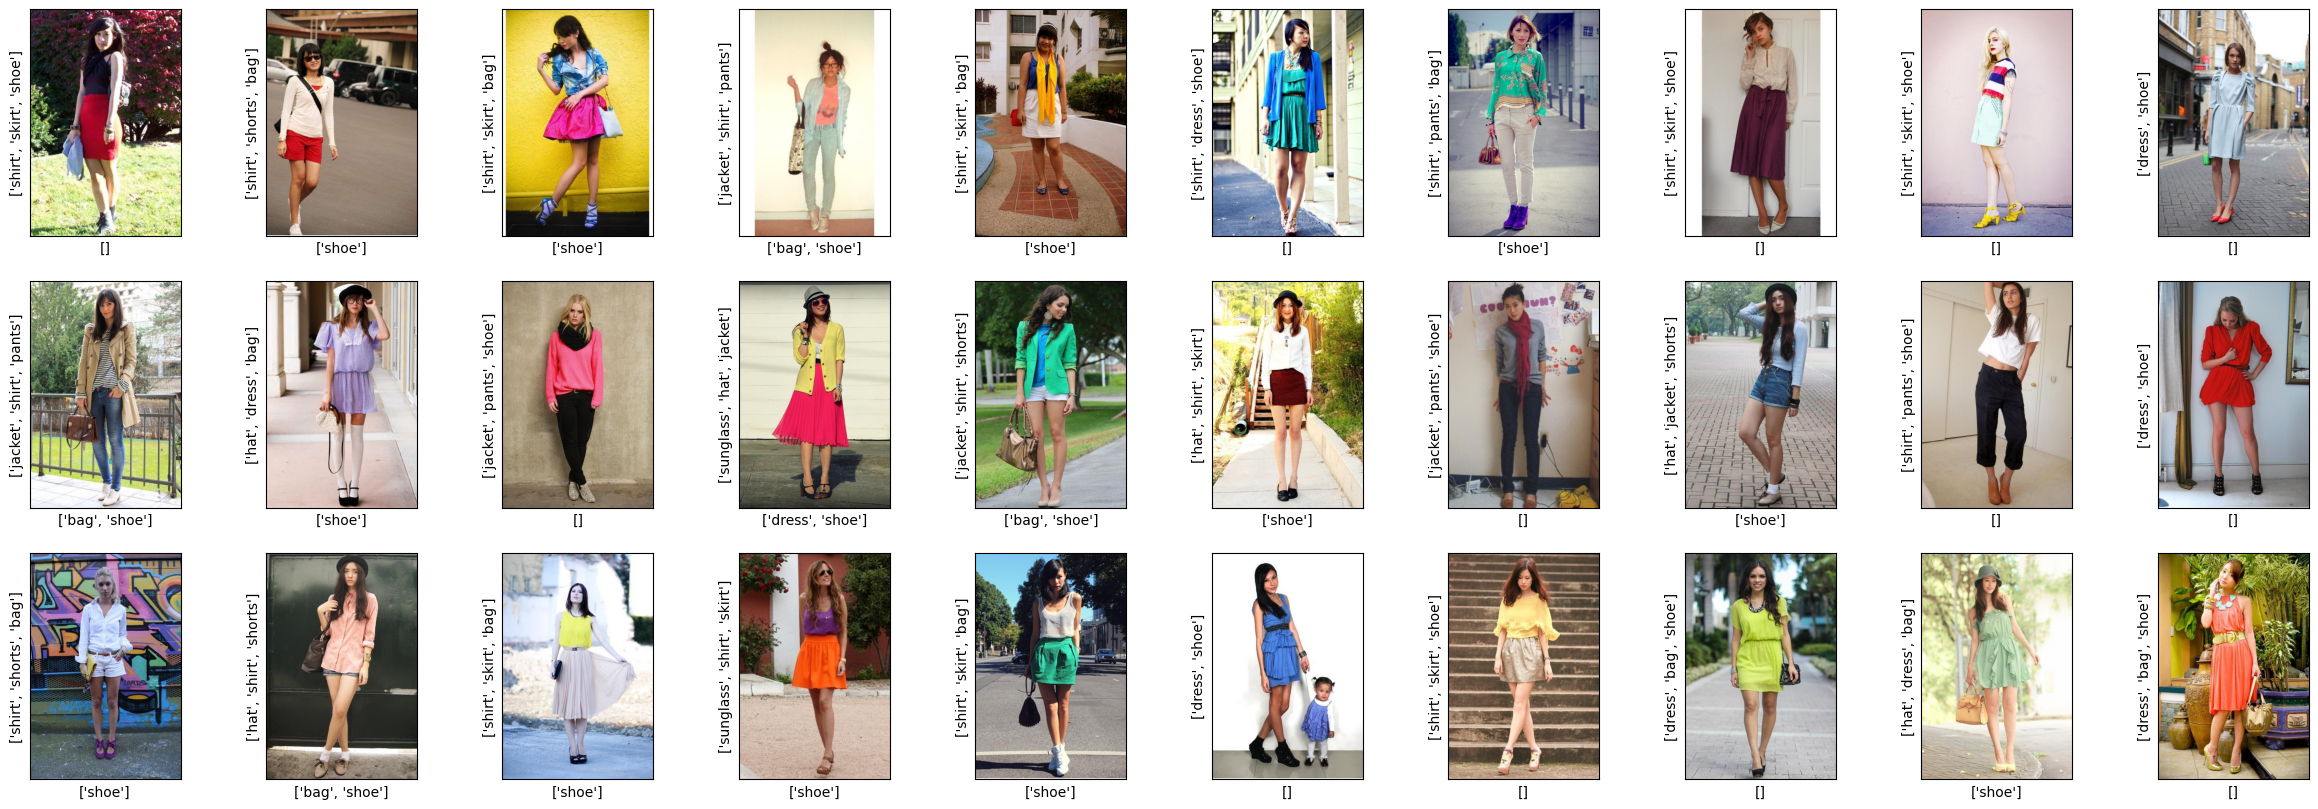

In [6]:
count = 0
idxs = [random.randint(0,1877) for i in range(30)]
plt.figure(figsize=(30, 10))
for idx in idxs:
    plt.subplot(3, 10, count+1)
    plt.imshow(X_train[idx])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel([l for i, l in enumerate(get_label(y_train[idx])) if i >2])
    plt.ylabel([l for i, l in enumerate(get_label(y_train[idx])) if i <3])
    count +=1
plt.show()

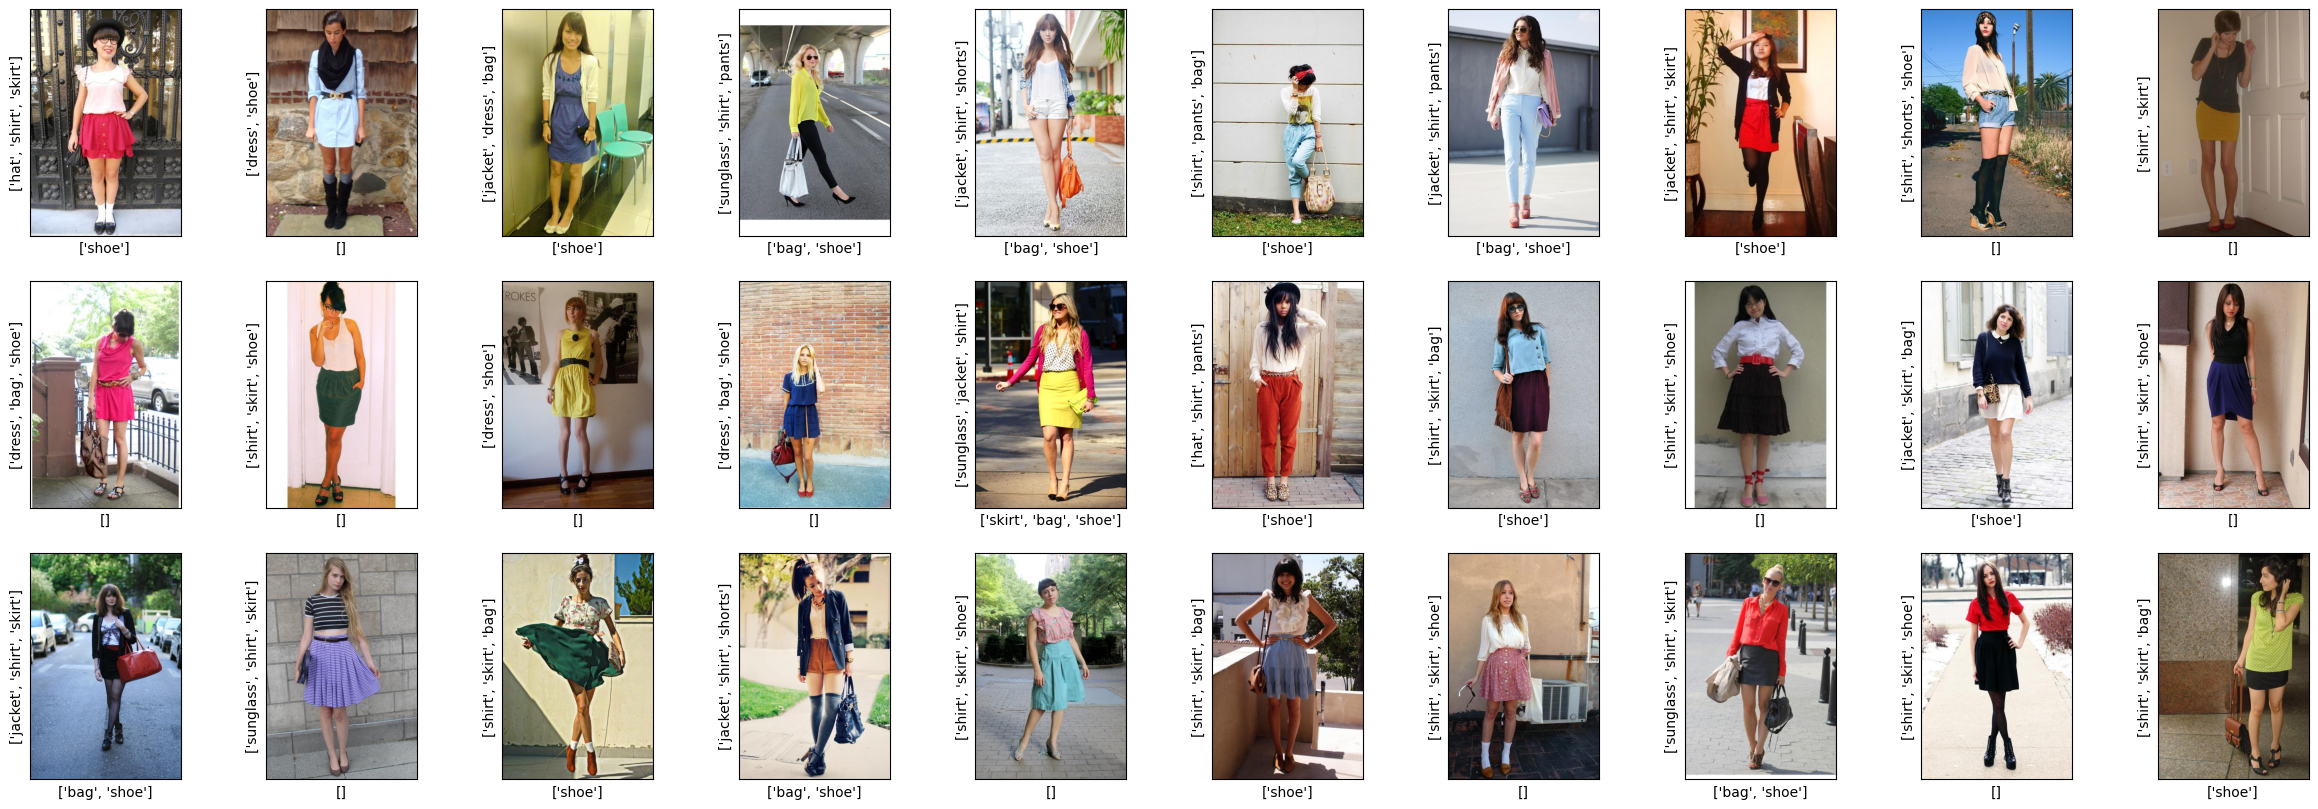

In [7]:
count = 0
idxs = [random.randint(0,805) for i in range(30)]
plt.figure(figsize=(30, 10))
for idx in idxs:
    plt.subplot(3, 10, count+1)
    plt.imshow(X_test[idx])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel([l for i, l in enumerate(get_label(y_test[idx])) if i >2])
    plt.ylabel([l for i, l in enumerate(get_label(y_test[idx])) if i <3])
    count +=1
plt.show()

In [8]:
input_shape = X_train[0].shape

In [9]:
output_unit = y_train.shape[-1]

In [10]:

model = tf.keras.Sequential([
    
    tf.keras.Input(shape=X_train.shape[1:]),
    
    
    layers.Conv2D(filters=32, kernel_size=(5,5), strides=(4,4), padding='valid'),
    layers.Activation('relu'),
    #layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters=64, kernel_size=(4,4), strides=(1,1), padding='valid'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='valid'),
    layers.Activation('relu'),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding='valid'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    layers.BatchNormalization(),

    layers.Conv2D(filters=1024, kernel_size=(3,3), strides=(1,1), padding='same'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'),
    layers.BatchNormalization(),

    layers.Conv2D(filters=2048, kernel_size=(3,3), strides=(1,1), padding='same'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'),
    layers.BatchNormalization(),

    layers.Flatten(),
    
    layers.Dense(1024),
    layers.Activation('relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),
    layers.Dense(512),
    layers.Activation('relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),


    layers.Dense(output_unit),
    layers.Activation('softmax')
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 149, 99, 32)    │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 149, 99, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 149, 99, 32)    │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 146, 96, 64)    │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 146, 96, 64)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 73, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 73, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 71, 46, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 71, 46, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 71, 46, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 69, 44, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 69, 44, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 34, 22, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 34, 22, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 20, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 32, 20, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 10, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 16, 10, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 16, 10, 1024)   │     4,719,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 16, 10, 1024)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 5, 1024)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 5, 1024)     │         4,096 │
│ (BatchNormalization)            │                        │             

 Total params: 50,899,658 (194.17 MB)

 Trainable params: 50,888,458 (194.12 MB)

 Non-trainable params: 11,200 (43.75 KB)

In [11]:
model.compile(
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

In [12]:
h = model.fit(
    x=X_train,
    y=y_train,
    epochs=10,
    validation_split=0.2,
    batch_size=32
)

Epoch 1/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 292s 6s/step - accuracy: 0.1079 - loss: 11.5366 - val_accuracy: 0.1197 - val_loss: 150.9041
Epoch 2/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 286s 6s/step - accuracy: 0.0873 - loss: 11.2127 - val_accuracy: 0.0053 - val_loss: 13.6250
Epoch 3/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 312s 7s/step - accuracy: 0.0306 - loss: 13.3538 - val_accuracy: 0.0665 - val_loss: 22.9812
Epoch 4/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 315s 7s/step - accuracy: 0.0220 - loss: 17.2316 - val_accuracy: 0.0665 - val_loss: 37.2390
Epoch 5/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 310s 7s/step - accuracy: 0.0380 - loss: 22.7238 - val_accuracy: 0.0824 - val_loss: 94.6546
Epoch 6/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 286s 6s/step - accuracy: 0.0360 - loss: 32.2968 - val_accuracy: 0.0665 - val_loss: 114.7391
Epoch 7/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 283s 6s/step - accuracy: 0.0480 - loss: 43.3519 - val_accuracy: 0.0000e+00 - val_loss: 560.4153
Epoch 8/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 288s 6s/step - accuracy: 0.0600 - loss: 58.2596 - va